# **MONTE CARLO METHODS AND FINITE-SIZE ANALYSIS IN PARAMAGNETIC-FERROMAGNETIC MODELS OF PHASE TRANSITION**

Authors:
* Carlo Divari
* Gloria Isotton
* Maryam Feizi
* Sara Munafò

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

from numba import jit, prange
from scipy.optimize import curve_fit


# **INTRODUCTION**

....

# **SIMULATION OF A 2D ISING MODEL**

....

# **PHASE TRANSITION ANALYSIS**

....

# ---Finite-size scaling---

## Data gathered with  L = 8,16,50,70,80,100,128

Below I put together the data gathered by Gloria (L=8,16,50,70,80) and by me (L=100,128) with the same temperatures and iterations.

In [2]:
L_tot = np.array([8,16,50,70,80,100,128])
nl = L_tot.shape[0]
nt = 80
Te = np.linspace(.5,3.8,nt)

In [3]:
data = np.loadtxt("magnetization.txt")
M_1 = np.array(data)
data = np.loadtxt("M_100_128.txt")
M_2 = np.array(data)

print(M_1.shape)
print(M_2.shape)

M = np.concatenate((M_1,M_2),axis=0) #All values of M from d=8 to d=128
np.savetxt("M_8_128.txt",M)

(5, 80)
(2, 80)


In [4]:
data = np.loadtxt("energy.txt")
E_1 = np.array(data)
data = np.loadtxt("E_100_128.txt")
E_2 = np.array(data)

print(E_1.shape)
print(E_2.shape)

E = np.concatenate((E_1,E_2),axis=0) #All values of E from d=8 to d=128
np.savetxt("E_8_128.txt",E)

(5, 80)
(2, 80)


In [5]:
data = np.loadtxt("specific_heat.txt")
C_1 = np.array(data)
data = np.loadtxt("C_100_128.txt")
C_2 = np.array(data)

print(C_1.shape)
print(C_2.shape)

C = np.concatenate((C_1,C_2),axis=0) #All values of C from d=8 to d=128
np.savetxt("C_8_128.txt",C)

(5, 80)
(2, 80)


In [6]:
data = np.loadtxt("Chi.txt")
Chi_1 = np.array(data)
data = np.loadtxt("Chi_100_128.txt")
Chi_2 = np.array(data)

print(Chi_1.shape)
print(Chi_2.shape)

Chi = np.concatenate((Chi_1,Chi_2),axis=0) #All values of Chi from d=8 to d=128
np.savetxt("Chi_8_128.txt",Chi)

(5, 80)
(2, 80)


In [7]:
def plot_values (E,M,C,Chi,L_val):
    titles = ['Energy','Magnetisation','Specific Heat','Susceptibility']
    #labels = ['e', 'm', 'c', 'chi']
    physical_quantities = [E,np.abs(M),C,Chi]
    plt.figure(figsize = (16,10))
    for i in range(len(physical_quantities)):
        ax = plt.subplot(2,2,i+1)
        ax.set_xlabel('Temperature', fontsize=18)
        ax.set_ylabel(titles[i], fontsize=18)
        ax.set_title(titles[i], fontsize = 20, fontweight = "bold" )
        ax.grid('--', alpha= 0.7)
        for j in range(nl):
            ax.plot(Te, physical_quantities[i][j] / L_val[j]**2, '.',markersize=9, label='N='+str(L_val[j]), alpha=0.7)
            
            ax.legend()
            
    plt.subplots_adjust(hspace=0.3)

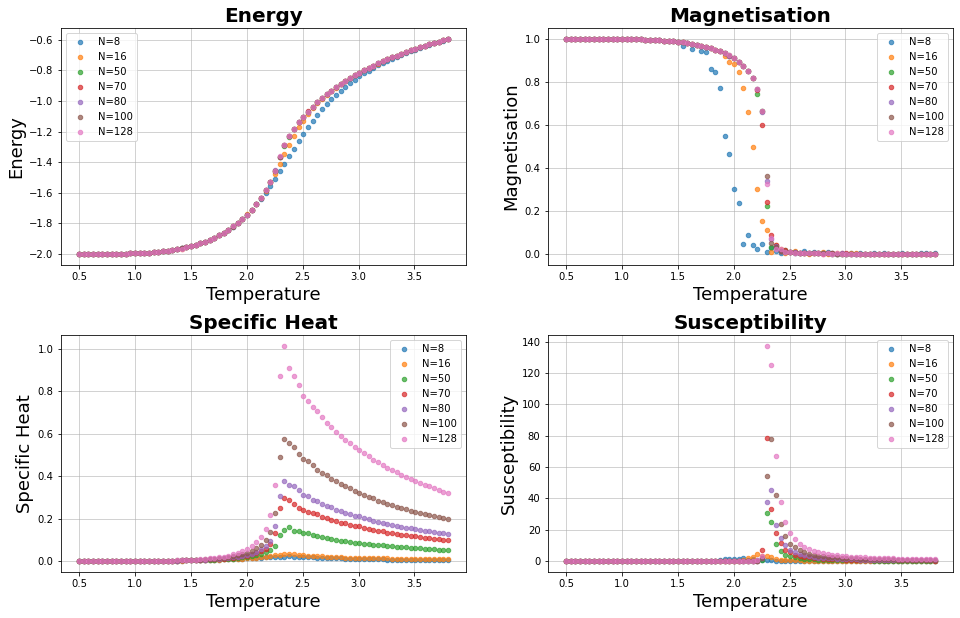

In [8]:
plot_values(E,M,C,Chi,L_tot)

## 1st attempt

For this attempt I followed the following reasoning: for a given volume V, the critical temperature at that volume (I worked with $\beta_c=1/T_c$) is correlated to the critical temperature at infinite dimension as follows: $$ |\beta_c(\infty)-\beta_c(V)|^{-\nu} \propto L$$
It follows: $$(1) \quad \beta_c(V)=\beta_c(\infty)-cL^{-1/\nu}$$     
For the susceptibility, the relation is: $$(2) \quad \chi_{max}=cL^{\gamma/\nu}$$

For each dimension L, the critical temperature for that dimension can be estimated by looking at the maximum of Chi:
- Find the max of Chi for each L, and the associated maximum T;
- Find $\beta_c(V)=\beta_{max}(V)=1/T_{max}(V)$;
- Fit $\beta_max$ to to the function (1) with $\beta_c(\infty),c$ and $x=-1/\nu$ as the parameters;
- Find $\gamma$ by fitting Chi_max to the function (2), where $z=\gamma/\nu$ with $\nu$ found before.    

The values should be:
- $\beta_c\sim 0.44$ (so that $T_c \sim 2.26$);
- $\nu=1$;
- $\gamma=1.75$.


T_{c} = 2.334 (95% confidence interval = 0.000 -0.001])

Exponent nu = 0.883 (95% confidence interval = -0.001 0.152])



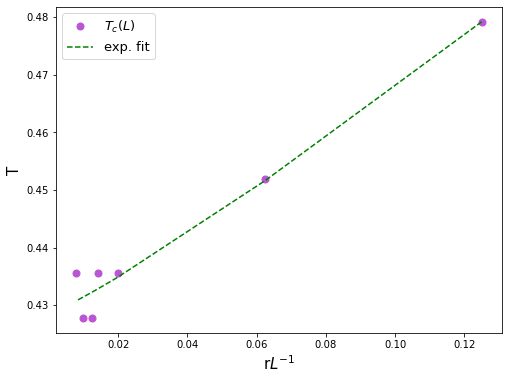

In [9]:
from scipy import optimize

nt = 80
Te = np.linspace(.5,3.8,nt)
T_c =2/np.log(1+np.sqrt(2))
L_tot = np.array([8,16,50,70,80,100,128])
nl = L_tot.shape[0]

Chi_max = np.zeros((nl,))
T_max = np.zeros((nl,))

for i in range(nl):
    imax = np.argmax(Chi[i,:])            
    Chi_max[i] = Chi[i,imax]
    T_max[i] = Te[imax]

beta_max = 1/T_max

def exp_fit(n,beta_c,c,x):
    beta_max = beta_c-c*n**x
    return beta_max

L_inv = np.array([1/L for L in L_tot])
guess = [0.45,0.2,1]
par, cov = curve_fit(exp_fit,L_inv,beta_max,guess,maxfev=int(1e6)) 
Tc_est = par[0]**(-1) 
nu = par[2]**(-1)
print('T_{{c}} = {0:1.3f} (95% confidence interval = {1:1.3f} {2:1.3f}])\n'.format(Tc_est, cov[0][0], cov[0][1]))
print('Exponent nu = {0:1.3f} (95% confidence interval = {1:1.3f} {2:1.3f}])\n'.format(nu, cov[1][0], cov[1][1]))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(L_inv, beta_max, 'o',markersize=7, color="mediumorchid", label="$T_{c}(L)$")
ax.plot(L_inv, exp_fit(L_inv,par[0],par[1],par[2]), 'g--', label="exp. fit")
ax.set_xlabel("r$L^{-1}$", fontsize=15)
ax.set_ylabel("T",fontsize=15)
ax.legend(loc="best",fontsize=13)


    

gamma = 3.484652621664485


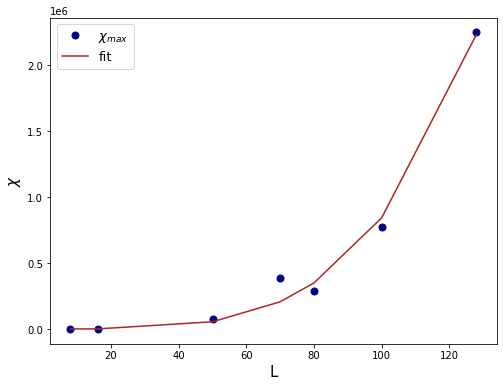

In [13]:
def chi_fit(L,c,z):
    Chi_max = c*(L**z)
    return Chi_max
 
guess = [int(1e2),1.7]
par_chi, cov_chi = curve_fit(chi_fit,L_tot,Chi_max,guess,maxfev=int(1e6))
z = par_chi[1]
gamma_1 = z*nu                                                      
print("gamma =", gamma_1)

fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("L",fontsize=15)
ax.set_ylabel("$\chi$",fontsize=15)
ax.plot(L_tot,Chi_max,'o',color="navy",markersize=7,label="$\chi_{max}$")
ax.plot(L_tot,chi_fit(L_tot,par_chi[0],par_chi[1]), color="firebrick", label="fit")
ax.legend(loc="best", fontsize=13)



As we can see, everything is bad. Except for the critical temperature which is kinda nice.

## 2nd attempt

This is a less detailed attempt, where I only try to estimate $\gamma$, not caring at all about the critical temperature, even if it's the only good thing in this notebook and the only reason I'm still alive.

In this attempt, I assume that $\nu=1$, and I only use the relation (2) from before to make a log-log fit of $\chi_{max}$ as a function of L.    
The fit turns out kind of good, but gamma is wrong. Since the fit is good, though, I think the problem is in our data, even if I don't even know what to do anymore.


gamma = 3.5504937201580566


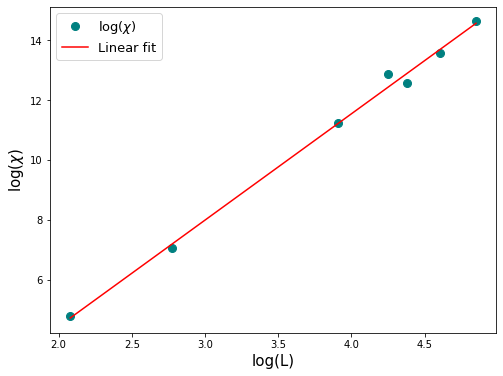

In [15]:
Chi_max = np.zeros((nl))
Tmax = np.zeros((nl))
for i in range(nl):   
    imax = np.argmax(Chi[i])
    Chi_max[i] = Chi[i,imax]
    Tmax[i] = Te[imax]

logchi = np.log(Chi_max)
logL = np.log(L_tot)

def gamma_fit(logL,z,c):
    logchi = z*logL+c
    return logchi

guess = [1.7,2]

params, covs = optimize.curve_fit(gamma_fit,logL,logchi,guess, maxfev=int(1e6))
gamma_2 = params[0]
print("gamma =", gamma_2)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(logL,logchi,'o',color="teal",markersize=8,label="log($\chi$)")
ax.plot(logL,gamma_fit(logL,params[0],params[1]), color="red", label="Linear fit")
ax.set_xlabel("log(L)",fontsize=15)
ax.set_ylabel("log($\chi$)", fontsize=15)
ax.legend(loc="best",fontsize=13)

## Checking the results

To be more precise, the order parameters don't exactly scale as a power law of L (for example, it is an approximation to say that $\chi_{max}\sim L^{\gamma/\nu}$).    
The proportionality between the power of L and $\chi$ is not a constant but it's the so called "scaling function", $\Psi$ such that: $$(3) \quad \chi\sim L^{\gamma/\nu}\Psi(L^{1/\nu}\tau)$$
where $\tau = \dfrac{T-T_c}{T_c}$.    
    
We can, therefore, try to plot $\chi/L^{\gamma/\nu}$ versus $\tau L^{1/\nu}$, varying the exponents until we get a data collapse.    
I did this just to check if the exponents found are actually the ones that best fit our data, and in fact they are, so there aren't mistakes in the code and the only way we can get a better estimate of gamma might be to change the way in which we gather the data (i.e. the concentration of points around the critical temperature).

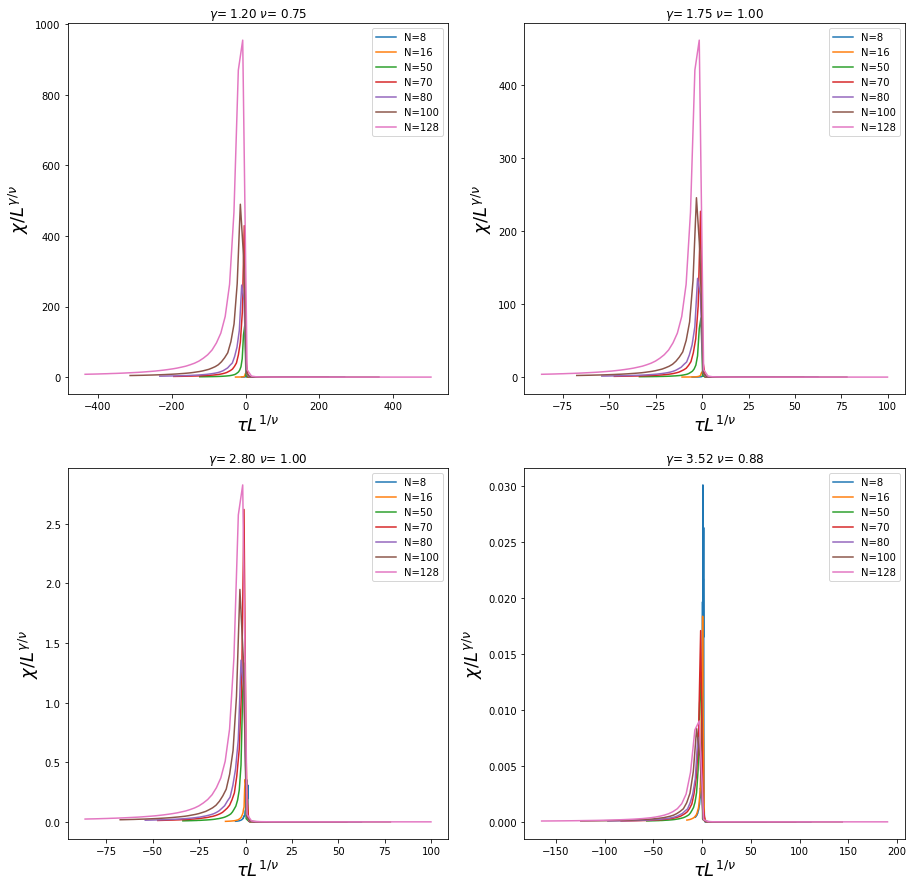

In [16]:
#def y(Chi,L,gamma,nu):
   # return Chi/(L**(gamma,nu))

#def x(Tc,L,nu):
  #  return  (1-T/Tc)*L**(1/nu)
    
gamma = (gamma_1+gamma_2)/2

gammas = [1.2,1.75,2.8,gamma]
nus = [0.75,1.,1.,nu]


def Scaling(gamma,nu):
    Chi_scaled = np.zeros((Chi.shape[0],Chi.shape[1]))
    for i in range(Chi.shape[0]):
        for j in range(Chi.shape[1]):
            Chi_scaled[i,j] = Chi[i,j]/(L_tot[i]**(gamma/nu))

    X_axis = np.zeros((nl,nt))
    for i in range(nl):
        for j in range(nt):
            X_axis[i,j] = (1-Te[j]/T_c)*L_tot[i]**(1/nu)
    return (Chi_scaled,X_axis)
        

plt.figure(figsize=(15,15))
for j in range(len(gammas)):
    Chi_scaled,X_axis = Scaling(gammas[j],nus[j])
    for i in range(nl):
        ax = plt.subplot(2,2,j+1)
        ax.set_xlabel(r"$\tau L^{1/\nu}$", fontsize=18)
        ax.set_ylabel(r"$\chi/L^{\gamma/\nu}$", fontsize=18)
        ax.plot(X_axis[i,],Chi_scaled[i,], label='N='+str(L_tot[i]))
        ax.set_title(r"$\gamma$= %.2f $\nu$= %.2f" %(gammas[j],nus[j]))
        ax.legend(loc='best')
    